## Training Loss, Train Data Accuracy, Test Data Accuracy over Epochs ##

In [173]:
import pandas as pd
import os

# Get all data
dual_lstm_df = pd.read_csv("./training_data/dual_lstm.csv")
dual_ffn_df = pd.read_csv("./training_data/dual_ffn.csv")
single_lstm_df = pd.read_csv("./training_data/single_lstm.csv")
single_ffn_df = pd.read_csv("./training_data/single_ffn.csv")

# os.path.join('.', 'training_data' ,'single_ffn.csv')

#### Bar Chart of Time spent training over Epoch ####

Text(0.5, 1.0, 'Training Time per Epoch')

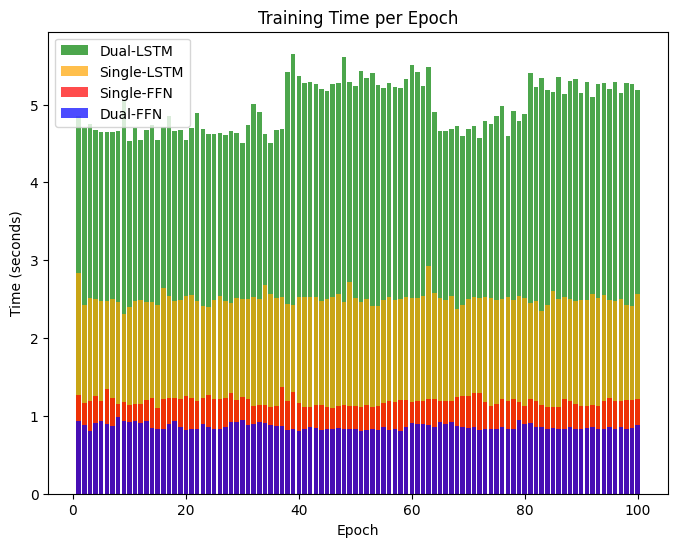

In [174]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(dual_lstm_df["Epoch"], dual_lstm_df["Time per Epoch (s)"], color='green', alpha=0.7, label="Dual-LSTM")
plt.bar(single_lstm_df["Epoch"], single_lstm_df["Time per Epoch (s)"], color='orange', alpha=0.7, label="Single-LSTM")
plt.bar(single_ffn_df["Epoch"], single_ffn_df["Time per Epoch (s)"], color='red', alpha=0.7, label="Single-FFN")
plt.bar(dual_ffn_df["Epoch"], dual_ffn_df["Time per Epoch (s)"], color='blue', alpha=0.7, label="Dual-FFN")

plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.legend()
plt.title("Training Time per Epoch")

In [175]:
dual_lstm_avg_time_per_epoch = dual_lstm_df["Time per Epoch (s)"].mean()
single_lstm_avg_time_per_epoch = single_lstm_df["Time per Epoch (s)"].mean()
single_ffn_avg_time_per_epoch = single_ffn_df["Time per Epoch (s)"].mean()
dual_ffn_avg_time_per_epoch = dual_ffn_df["Time per Epoch (s)"].mean()

print(f"Average time per epoch for Dual-LSTM (s): {dual_lstm_avg_time_per_epoch}")
print(f"Average time per epoch for Single-LSTM (s): {single_lstm_avg_time_per_epoch}")
print(f"Average time per epoch for Single-FFN (s): {single_ffn_avg_time_per_epoch}")
print(f"Average time per epoch for Dual-FFN (s): {dual_ffn_avg_time_per_epoch}")

Average time per epoch for Dual-LSTM (s): 4.977761974334717
Average time per epoch for Single-LSTM (s): 2.5040992856025697
Average time per epoch for Single-FFN (s): 1.1875636386871338
Average time per epoch for Dual-FFN (s): 0.8628984355926513


#### Plot training loss ####

Text(0.5, 1.0, 'Loss over Epochs')

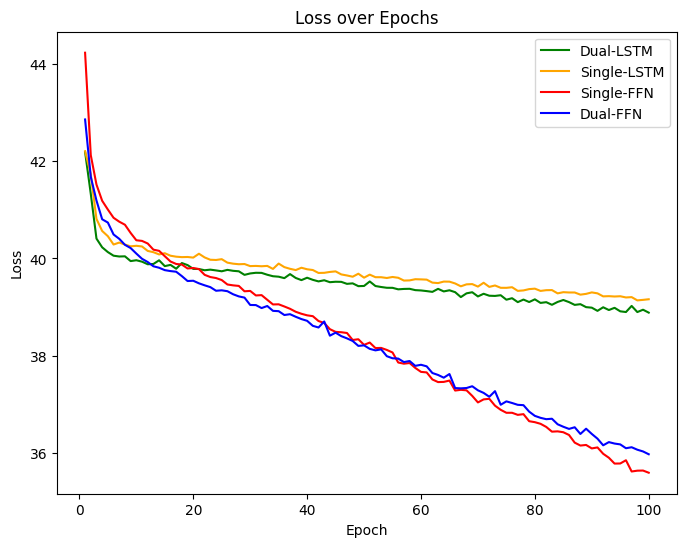

In [176]:
plt.figure(figsize=(8, 6))

plt.plot(dual_lstm_df["Epoch"], dual_lstm_df["Train Loss"], color='green', alpha=1, label="Dual-LSTM")
plt.plot(single_lstm_df["Epoch"], single_lstm_df["Train Loss"], color='orange', alpha=1, label="Single-LSTM")
plt.plot(single_ffn_df["Epoch"], single_ffn_df["Train Loss"], color='red', alpha=1, label="Single-FFN")
plt.plot(dual_ffn_df["Epoch"], dual_ffn_df["Train Loss"], color='blue', alpha=1, label="Dual-FFN")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

#### Plot Train accuracy ####

Text(0.5, 1.0, 'Train Accuracy over Epochs')

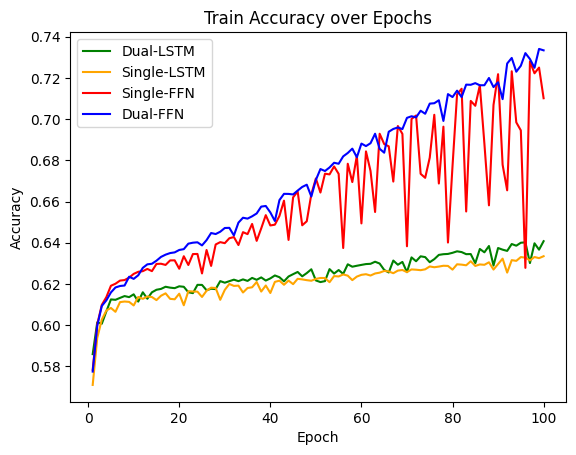

In [177]:
plt.plot(dual_lstm_df["Epoch"], dual_lstm_df["Train Accuracy"], color='green', alpha=1, label="Dual-LSTM")
plt.plot(single_lstm_df["Epoch"], single_lstm_df["Train Accuracy"], color='orange', alpha=1, label="Single-LSTM")
plt.plot(single_ffn_df["Epoch"], single_ffn_df["Train Accuracy"], color='red', alpha=1, label="Single-FFN")
plt.plot(dual_ffn_df["Epoch"], dual_ffn_df["Train Accuracy"], color='blue', alpha=1, label="Dual-FFN")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train Accuracy over Epochs")

#### Plot test accuracy ####

Text(0.5, 1.0, 'Test Accuracy over Epochs')

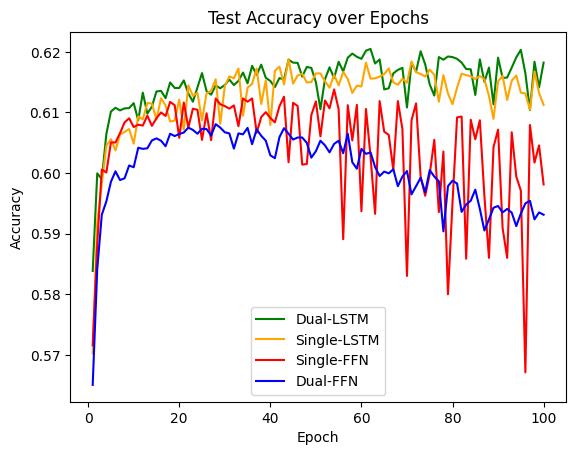

In [178]:
plt.plot(dual_lstm_df["Epoch"], dual_lstm_df["Test Accuracy"], color='green', alpha=1, label="Dual-LSTM")
plt.plot(single_lstm_df["Epoch"], single_lstm_df["Test Accuracy"], color='orange', alpha=1, label="Single-LSTM")
plt.plot(single_ffn_df["Epoch"], single_ffn_df["Test Accuracy"], color='red', alpha=1, label="Single-FFN")
plt.plot(dual_ffn_df["Epoch"], dual_ffn_df["Test Accuracy"], color='blue', alpha=1, label="Dual-FFN")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Test Accuracy over Epochs")

## Load all models ##

In [179]:
# Import all architectures
from DNN_Architectures.SiameseDualLSTM import SiameseDualLSTM
from DNN_Architectures.NBA_LSTM import NBA_LSTM
from DNN_Architectures.DualTeamFFN import DualTeamFFN
from DNN_Architectures.FFN import FFN

# Create all models
dual_lstm = SiameseDualLSTM(input_size=42, hidden_size=128, num_layers=2, dropout=0.3)
single_lstm = NBA_LSTM()
dual_ffn = DualTeamFFN()
single_ffn = FFN(input_size=420)

In [180]:
import os
import torch

# Load the model's state_dict

path = os.path.join('.', 'models', 'single_lstm_model.pth')
single_lstm.load_state_dict(torch.load(path))
single_lstm.eval()

path = os.path.join('.', 'models', 'single_ffn_model.pth')
single_ffn.load_state_dict(torch.load(path))
single_ffn.eval()

path = os.path.join('.', 'models', 'dual_lstm_model.pth')
dual_lstm.load_state_dict(torch.load(path))
dual_lstm.eval()

path = os.path.join('.', 'models', 'dual_ffn_model.pth')
dual_ffn.load_state_dict(torch.load(path))
dual_ffn.eval()

C:\Users\Alex1\AppData\Local\Temp\ipykernel_80436\498174785.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  single_lstm.load_state_dict(torch.load(path))
C:\Users\Alex1\

DualTeamFFN(
  (primary_net): TeamFFN(
    (subnet): Sequential(
      (0): Linear(in_features=210, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.3, inplace=False)
      (4): Linear(in_features=128, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
    )
  )
  (opposing_net): TeamFFN(
    (subnet): Sequential(
      (0): Linear(in_features=210, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.3, inplace=False)
      (4): Linear(in_features=128, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
    )
  )
  (final_layers): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=Tru

In [181]:
import pickle

### Load Simple Classifiers
from sklearn.model_selection import GridSearchCV

model_path = os.path.join('.', 'models')

# Load Logistic Regression
with open(os.path.join(model_path, 'logistic_regression.pkl'), "rb") as f:
    logistic_model = pickle.load(f)

# Load Gaussian Naive Bayes
with open(os.path.join(model_path, "gaussian_naive_bayes.pkl"), "rb") as f:
    gnb_model = pickle.load(f)

#### Confusion Matrix ####

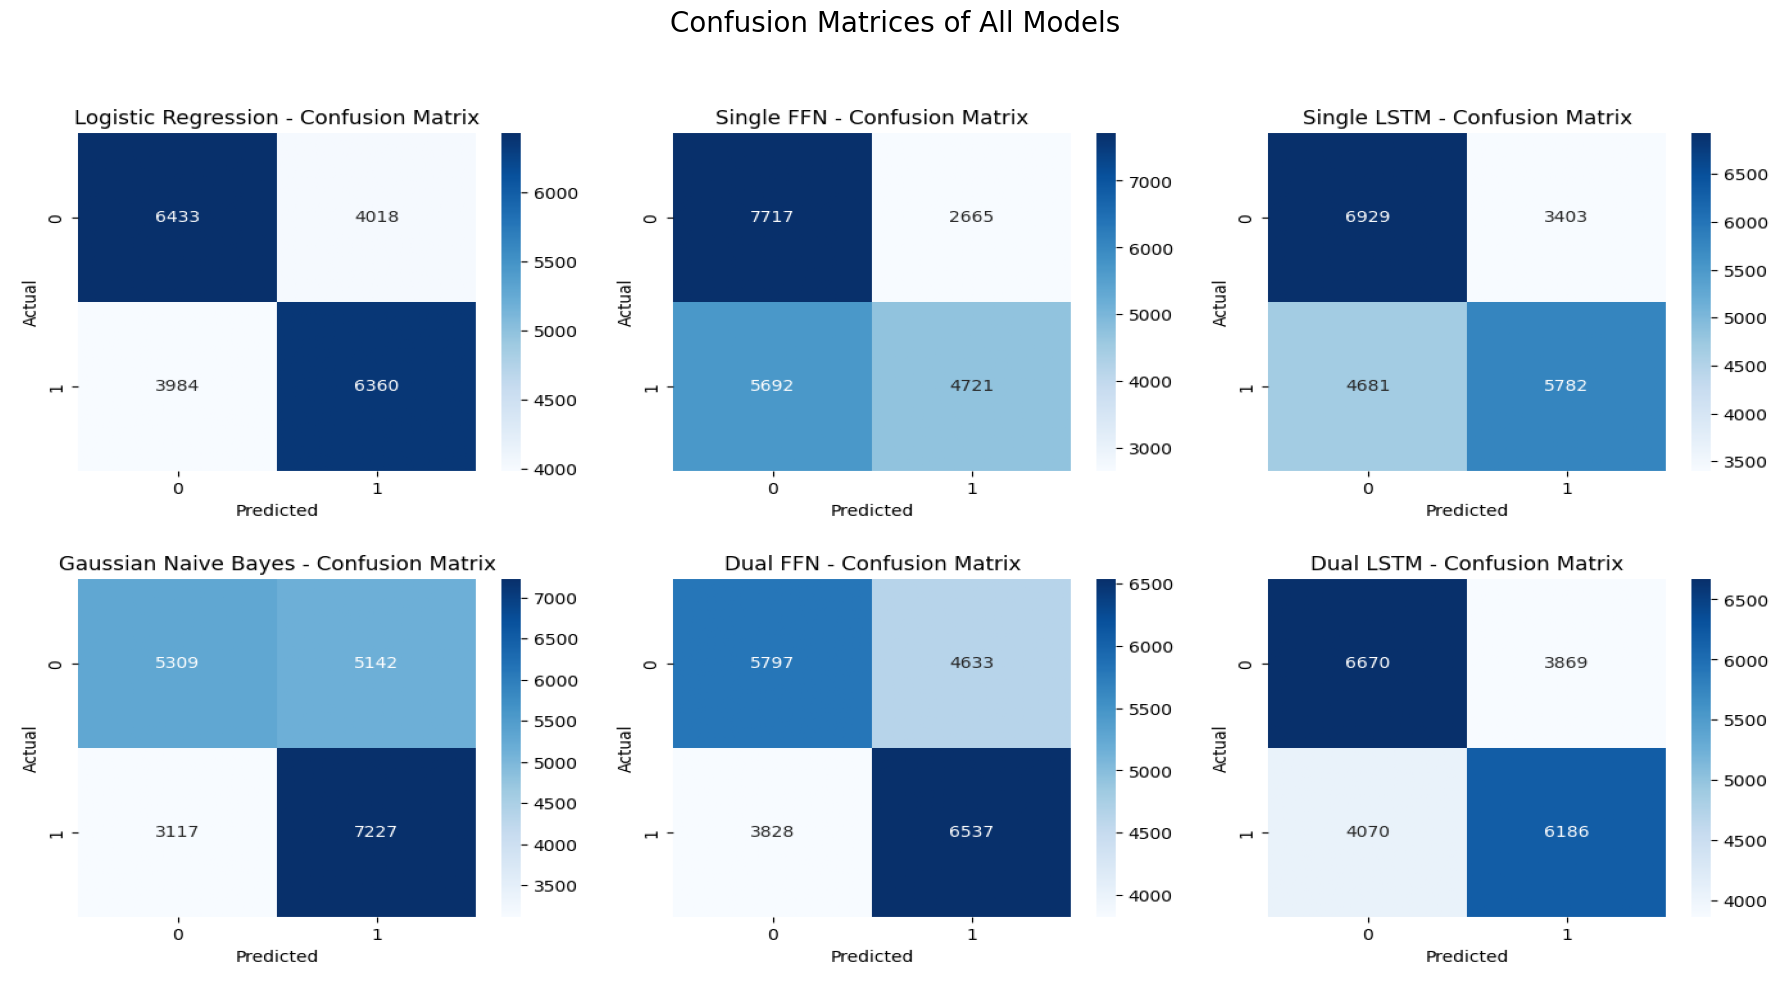

In [207]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# Load and display saved images
img0 = mpimg.imread("cm_logreg.png")
img1 = mpimg.imread("cm_singleffn.png")
img2 = mpimg.imread("cm_singlelstm.png")
img3 = mpimg.imread("cm_gnb.png")
img4 = mpimg.imread("cm_dualffn.png")
img5 = mpimg.imread("cm_duallstm.png")

axes[1].imshow(img1)
axes[1].axis('off')

axes[2].imshow(img2)
axes[2].axis('off')

axes[3].imshow(img3)
axes[3].axis('off')

axes[0].imshow(img0)
axes[0].axis('off')

axes[4].imshow(img4)
axes[4].axis('off')

axes[5].imshow(img5)
axes[5].axis('off')

# Force image subplots to scale similarly to the others
axes[1].set_aspect('auto')
axes[4].set_aspect('auto')
axes[2].set_aspect('auto')
axes[5].set_aspect('auto')
axes[0].set_aspect('auto')
axes[3].set_aspect('auto')

# Super title and spacing
fig.suptitle("Confusion Matrices of All Models", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Probability Distribution ###

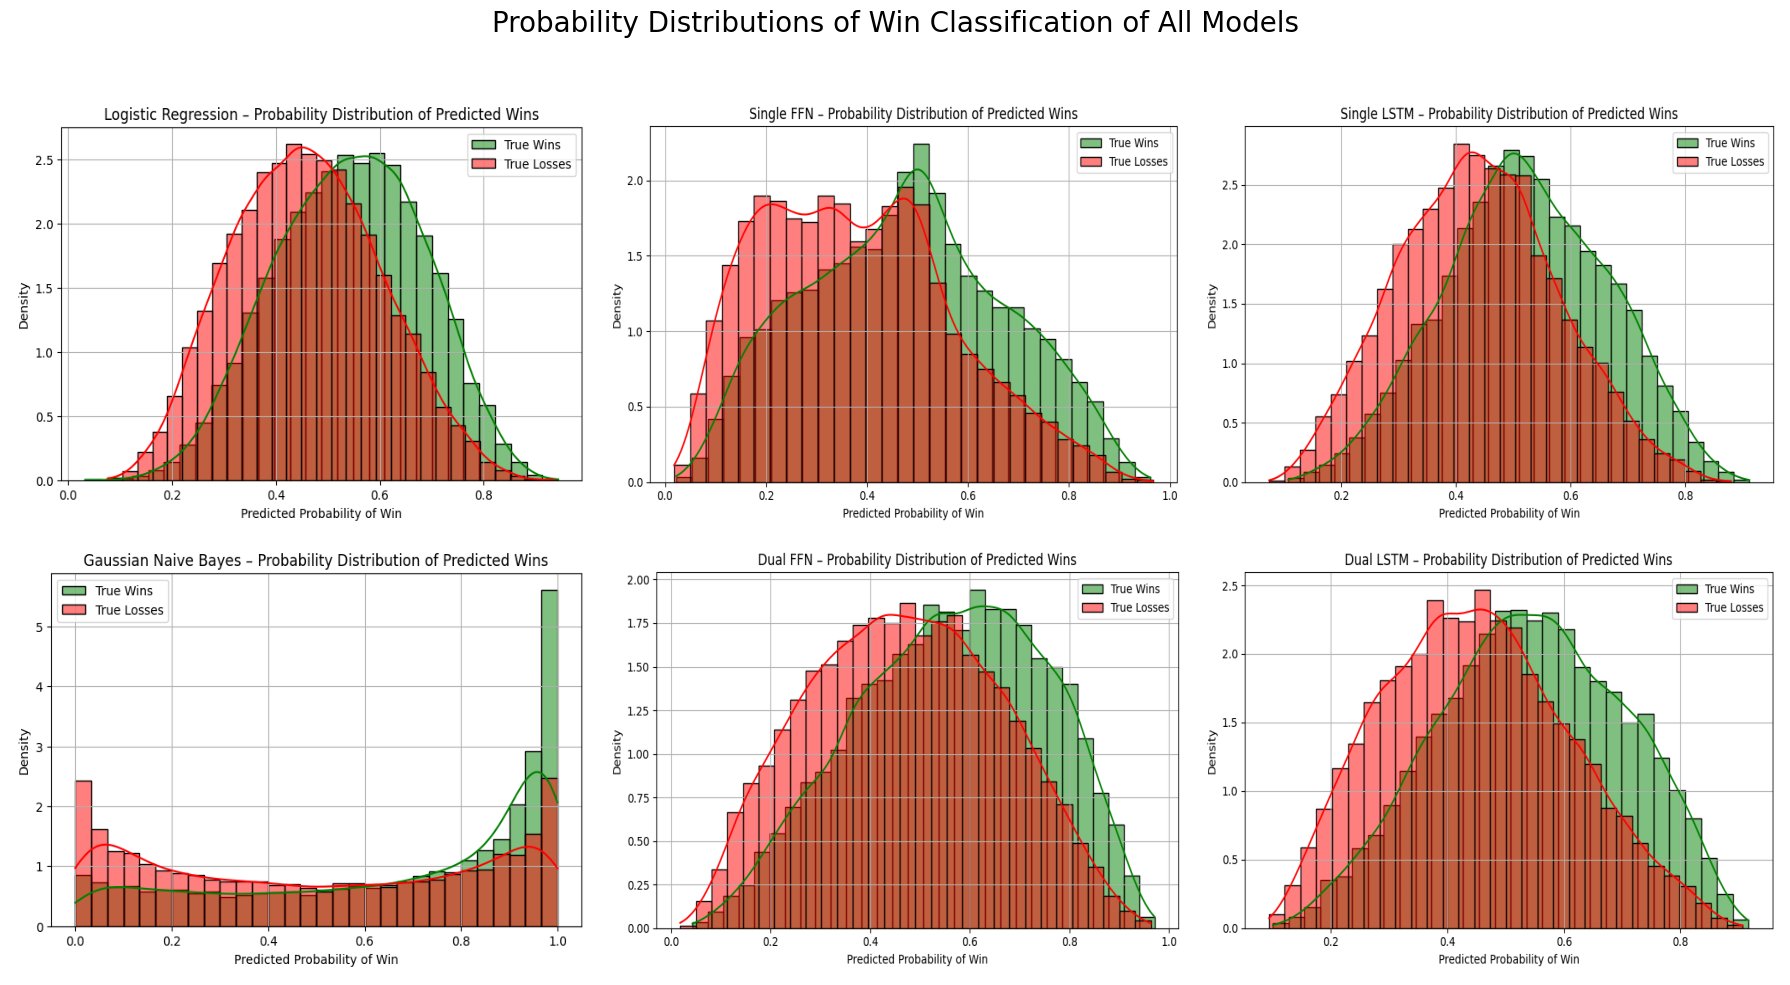

In [208]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# Load and display saved images
img0 = mpimg.imread("probdist_logreg.png")
img1 = mpimg.imread("probdist_singleffn.png")
img2 = mpimg.imread("probdist_singlelstm.png")
img3 = mpimg.imread("probdist_gnb.png")
img4 = mpimg.imread("probdist_dualffn.png")
img5 = mpimg.imread("probdist_duallstm.png")

axes[1].imshow(img1)
axes[1].axis('off')

axes[2].imshow(img2)
axes[2].axis('off')

axes[3].imshow(img3)
axes[3].axis('off')

axes[0].imshow(img0)
axes[0].axis('off')

axes[4].imshow(img4)
axes[4].axis('off')

axes[5].imshow(img5)
axes[5].axis('off')

# Force image subplots to scale similarly to the others
axes[1].set_aspect('auto')
axes[4].set_aspect('auto')
axes[2].set_aspect('auto')
axes[5].set_aspect('auto')
axes[0].set_aspect('auto')
axes[3].set_aspect('auto')

# Super title and spacing
fig.suptitle("Probability Distributions of Win Classification of All Models", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Plot ROC-AUC Curve ###

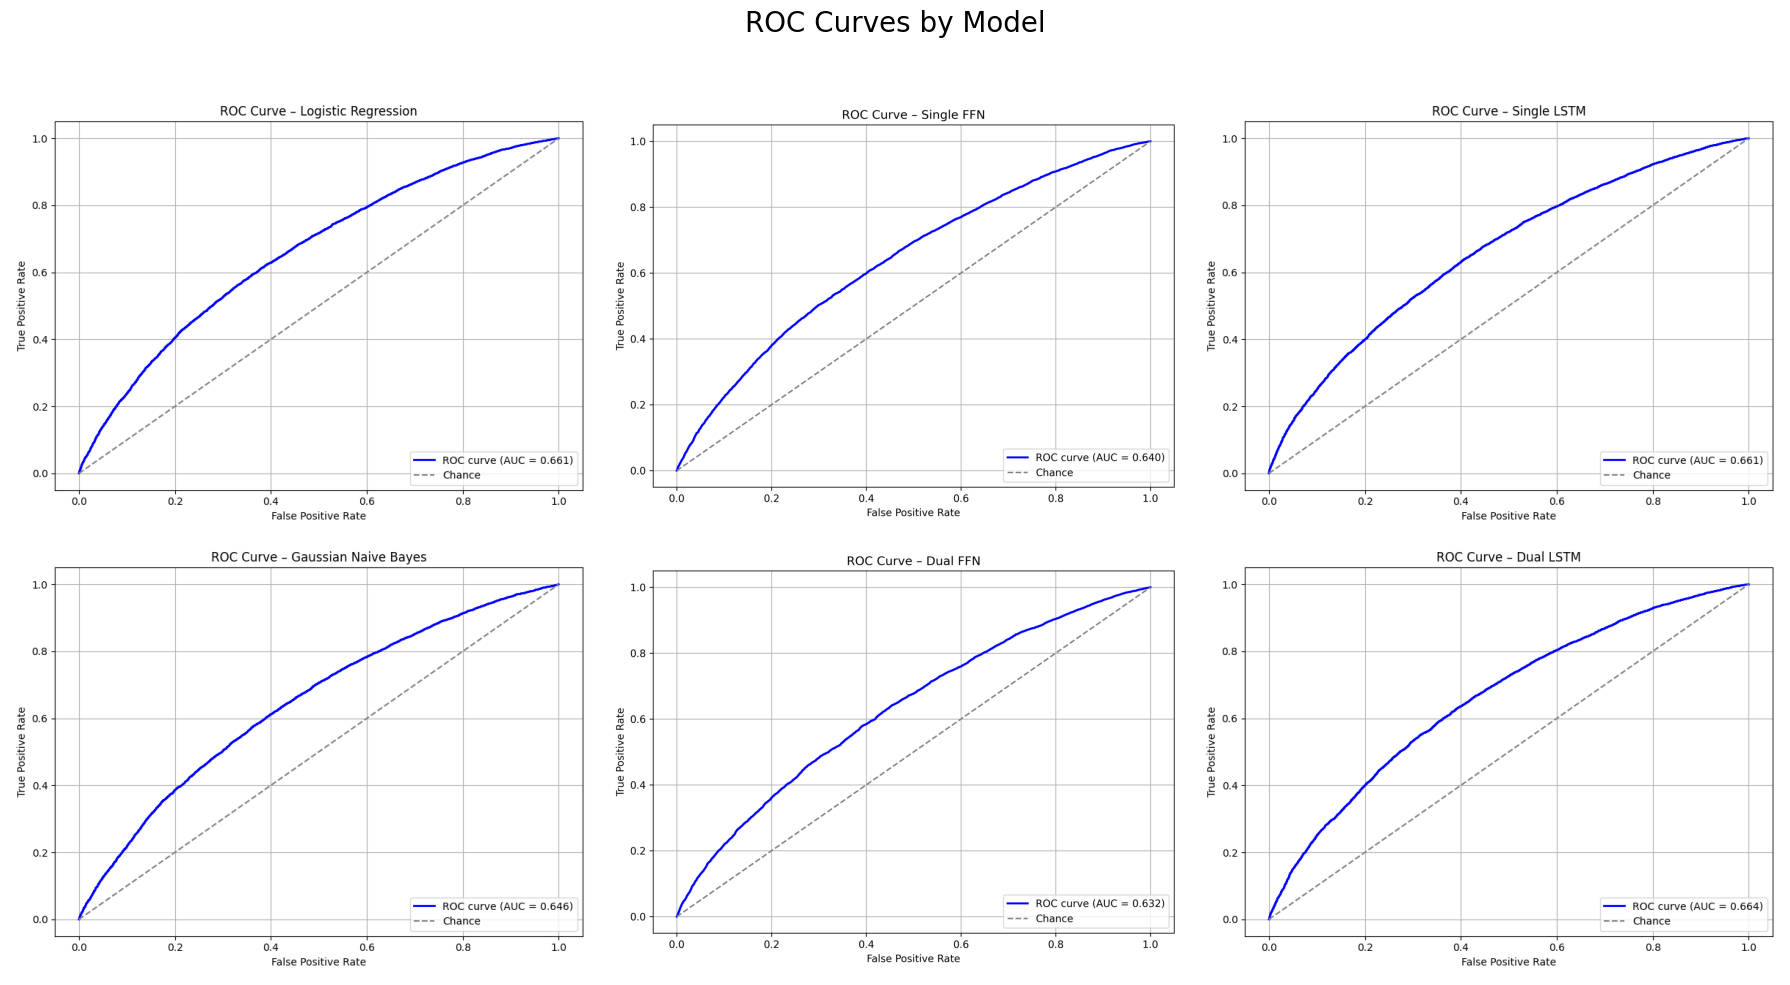

In [209]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# Load and display saved images
img0 = mpimg.imread("roc_curve_logreg.png")
img1 = mpimg.imread("roc_curve_singleffn.png")
img2 = mpimg.imread("roc_curve_singlelstm.png")
img3 = mpimg.imread("roc_curve_gnb.png")
img4 = mpimg.imread("roc_curve_dualffn.png")
img5 = mpimg.imread("roc_curve_duallstm.png")

axes[1].imshow(img1)
axes[1].axis('off')

axes[2].imshow(img2)
axes[2].axis('off')

axes[3].imshow(img3)
axes[3].axis('off')

axes[0].imshow(img0)
axes[0].axis('off')

axes[4].imshow(img4)
axes[4].axis('off')

axes[5].imshow(img5)
axes[5].axis('off')

# Force image subplots to scale similarly to the others
axes[1].set_aspect('auto')
axes[4].set_aspect('auto')
axes[2].set_aspect('auto')
axes[5].set_aspect('auto')
axes[0].set_aspect('auto')
axes[3].set_aspect('auto')

# Super title and spacing
fig.suptitle("ROC Curves by Model", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()